<a href="https://colab.research.google.com/github/a-forty-two/DFEData2/blob/main/004_EDA_Clean_Data_BreastCancerAnalysis_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azureml
!pip install azureml-core
!pip install azureml-dataset-runtime

     |████████████████████████████████| 2.2 MB 13.5 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 412 kB 65.8 MB/s 
     |████████████████████████████████| 547 kB 69.1 MB/s 
     |████████████████████████████████| 141 kB 85.4 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 928 kB 73.5 MB/s 
     |████████████████████████████████| 3.0 MB 30.6 MB/s 
     |████████████████████████████████| 109 kB 73.0 MB/s 
     |████████████████████████████████| 146 kB 71.8 MB/s 
     |████████████████████████████████| 1.3 MB 69.0 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 176 kB 54.6 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |██████████████████████

In [2]:
import numpy as np
import pandas as pd
from azureml.core import Workspace, Dataset

subscription_id = '3421760b-dade-4bef-8b43-6e106dec4e27'
resource_group = 'otterishungry'
workspace_name = 'cantthinkofaname'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='bca')
data = dataset.to_pandas_dataframe()
data.head()

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code DGX6YTEVT to authenticate.
You have logged in. Now let us find all the subscriptions to which you have access...


Failed to authenticate to tenant '72f988bf-86f1-41af-91ab-2d7cd011db47' due to error 'Get Token request returned http error: 400 and server response: {"error":"interaction_required","error_description":"AADSTS50076: Due to a configuration change made by your administrator, or because you moved to a new location, you must use multi-factor authentication to access '797f4846-ba00-4fd7-ba43-dac1f8f63013'.\r\nTrace ID: 924bc9d8-e948-4554-bc04-fb52d7edcc00\r\nCorrelation ID: 60875535-3baf-4c14-b9ff-56519a7c2882\r\nTimestamp: 2021-11-03 14:39:47Z","error_codes":[50076],"timestamp":"2021-11-03 14:39:47Z","trace_id":"924bc9d8-e948-4554-bc04-fb52d7edcc00","correlation_id":"60875535-3baf-4c14-b9ff-56519a7c2882","error_uri":"https://login.microsoftonline.com/error?code=50076","suberror":"basic_action"}'.Will continue to look for other tenants to find subscriptions to which you have access


Interactive authentication successfully completed.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.columns
mySelectedCols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
myData = data.loc[:, mySelectedCols] # names to be provided
#myData = data.iloc[:, :12] # position/ranges of numbers to be provided 
# all input except id and diagnosis 
# input = data.iloc[:, 2:12]
myData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
#!wget no-check-certificate \
#  https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv \
#  -O data.csv
  # wget to download public internet content 

In [4]:
# DO I REALLY NEED ALL OF MY DATA IN ORDER TO PREDICT CANCER?

# ARE There more important and less important variables?
# does ID decide whether a cell has cancer or not?

# Is my data usable? 
# column called height -> are all values in inches or some in inch and some in cm, and some in metre?

# GAME THEORY-> Business -> players with profit and loss 
# Players -> You and Me 
# CORRELATION is what happens to you , if something happens to me 

# if me increases, you increases -> good and profitable partnership! -> POS Correlation
# if me increases, you decreases -> adversaries or competition! -> Neg Correlation
# if me increase, you don't care!! -> WHAT WAS 'YOU' doing in the game at all then? -> 0 Correlation 

# how to decide if Me or You would've have won the game?
# KEEP case 1, case 2
# CASE 3-> YOU Don't CARE is useless and SHOULD BE REMOVED 

# WE want to keep POSITIVE and NEGATIVE correlations 
# WE want to drop columns whose correlation with 'OTHERS' is tending to 0 

# CORRELATION shifts ONLY between -1 to +1 -> mathematically easier to understand 
# and use in formula then cov

# 1) THE column or variable or feature should be USELESS (cor->0) wrt every input variable 
# 2)  THE column or variable or feature should be USELESS (cor->0) wrt OUTPUT also


crs = data.corr() # ONLY WORKS for numbers, not STRINGS 


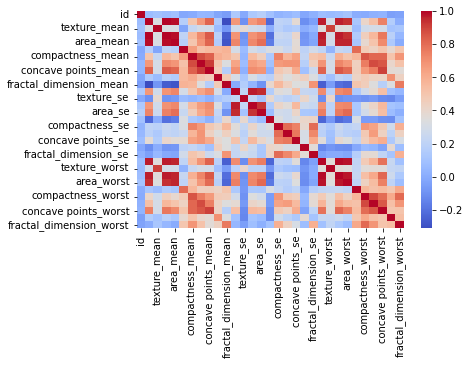

In [5]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# 2,3 Visualizations functions=> statisitical (pyplot), advanced graphs (seaborn), charts(jS)

# Doctor is new -> 100 medicines for 1 disease
# old doctor -> 1 medicine for 100 diseases 

crs = data.corr()
sns.heatmap(crs, cmap='coolwarm')
# BECAUSE ID feature's ENTIRE ROW and COLUMN is light blue (color for tending to 0),
# it is SAFE to assume that it was not useful for other input variables 

# ANIMAL FARM: All animals are equal, but some animals are more equal than the others


In [6]:
# Diagnosis -> M and B
# ENCODING means converting data from one format to another format 

# We plot our data again, with r.t. our output 
# we should be able to identify what points belonged to M cancers, and which ones to Benign points
# COLOR_ENCODING 
# Malign -> Red, Benign -> Blue 
#

# FUNCTION to read my data, convert m and B into red and blue one by one
# BUT THAT TAKES TIME, even LOOP takes time 
# MAP is a way to 'map the function' to every element pf dataset
# All my temp was in Faren. but I wanted it in Celcius-> ENCODING 
# LAMBDA -> to convert a single Deg F into Deg C 
# then MAP this lambda logic to every element of that temperature column of dataset


diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis
inputs = data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ]


#print(len(data[data.diagnosis=='M']))
#print(len(data[data.diagnosis=='B']))


# positive nos. -> left to right
# neg nos. -> right to left 
# why do we use lambda?
# FUNCTIONS -> require jump on thread level 
# thread is hardware allocation to execute a PROCESS 
# JUMPING a thread -> time will be required to make that jump, execute function at it's address
# then return to the place you jumped from 

# lambda input: what_to_return_for_that_input
# lambda x,y: x+Y 

<Figure size 432x288 with 0 Axes>

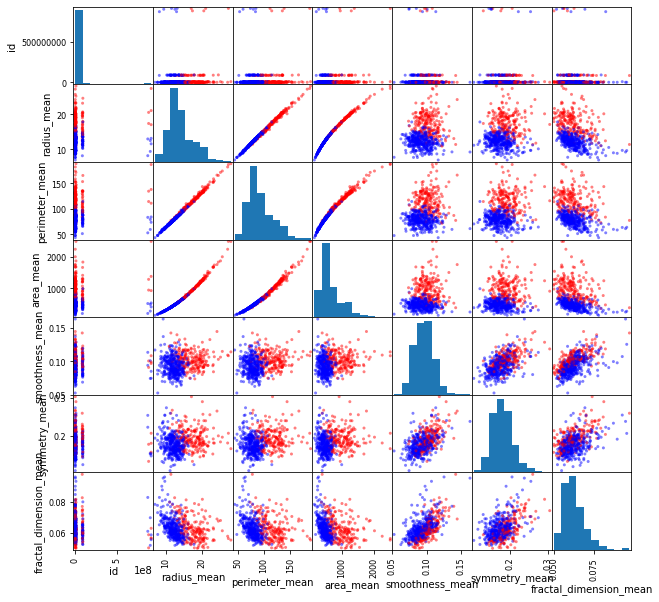

In [7]:
# PLOT inputs but with respect to the OUTPUT plots (M, B)
# size will be different for different machine 
# 1 on my figsize means 72 on my web page 

# OS to interact with hardware -> files or drivers to interact with h/w
# BUFFERS -> keyboard, mouse, monitor 
# print -> print writes to the output buffer
# output buffer is a pointer to SCREEN or PRINTER or PROJECTOR 
# SCANF, System.io.readline, console.read, -> ALL of these are only reading from input buffer

# if there was GARBAGE in input buffer, you will get GARBAGE in variable also 
# KEYLOGGER -> log every user activity in form of keyboard strokes 
# because it is NOT recording your keyboard -> recording your input buffer 

inputs_small = data.loc[:,['id','radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]

plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inputs_small, c=diagnosis_encoded, figsize=(10,10))
plt.show() # not required in iPython 

# SINCE BOTH GRAPHS are indicating that ID is useless, we can set it to index instead!
# that way, it will not participate as actual data, and not lost either


# BOTH THE SCATTER PLOT AND HEATMAP have demonstrated that ID wAS NOT useful for them!!! 

# How should we handle ID? - we could 've dropped it! 
# For a new ID, we detected Malignant result. if we don't have ID, how do we patient and tell
# them result????




# BUFFERS -> PANDAS, SEABORN, PYPLOT all of them are just trying to write into a BUFFER from
# which graph will be drawn 

# 


# BLACKBOARD -> Plt.figure() -> cleaning that blackboard 
# SEABORN, PANDAS, PLOTLY, PYPLOT -> are people who will pick up chalk and write on this blackboard
# plt.show() -> Whatever is on this blackboard, is shown to the user 

# YOU DON't explicitly link these libraries to MATPLOTLIB 

# ID Columns and Row > lines are parallel to X/Y axises! > NO Correlation! 

# THAT IS WHY plt.figure is critical -> else small chance of working with garbage 

A strong formula indicates a MATHEMATICAL RELATIONSHIP. (Mathematical Induction) 

Between Area and Radius, or perimeter and radius! 

IF THE RELATIONSHIP WAS SO STRONG, that there WAS  a FORMULA, then you DO NOT NEED MACHINE LEARNING 

If there was formulae, we'd rather use that formula!

In [ ]:
# IF DATA IS SMALL or PRESENCE of ONLY STRAIGHT LINES-> DO NOT USE MACHINE LEARNING!!!
# A mathematical formula or calulator or excel sheet would have been better!!

# We will use ML BECAUSE there is NO SPECIFIC FORMULA THAT THIS DATA COULD HAVE PROVIDED 
# Formulae to detect CANCER 


In [8]:
inputs.head()
# since ID is useless, but we don't want to lose it either
# we'll set it to index instead
clean_input = inputs.set_index('id')    #, inplace=True)
clean_input.head() # input where INDEX is ID

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
clean_input.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [11]:
from azureml.core import Datastore, Dataset
existingdatastore = 'workspaceblobstore'
datastore = Datastore.get(workspace, existingdatastore)
dataset = Dataset.Tabular.register_pandas_dataframe(clean_input, datastore, "cleanerBCA", show_progress=True)


Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/1a3075f7-cc2c-4028-bbdd-144731ef1c44/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


In [ ]:
# SHOULD I USE ALL THESE USEFUL VARIABLES, or COULD i have used better variables 

# What's a good variable and a bad variable 

# I wanted to classify people as TALL or SHORT 
# SOMEBODY collected data, and provided following features for people:
# Height, Favorite Color, City_last_lived, year_born 

# IS THERE A THRESHOLD H in height such that, above that threshold all were TALL, and below
# that threshold all were SHORT, then HEIGHT was a good variable 

# YEAR BORN -> above 1982 is tall, before that short ? NO? BAD VARIABLE!!!! 

# DISTRIBUTION CHECK <- we draw the data distribution and check if M and B were DISTINCTLY
# distributed or if there was some overlap area? 

# THIS OVERLAP AREA IS CONFUSION AREA => this areA cannot be clearly classified as M or B 

# Gaussian Distribution (SCALE 0 to 1 -> NORMAL DISTRIBUTION), Poisson Distribution
# NORMAL means (0 to 90 degrees) or (0 to 1)




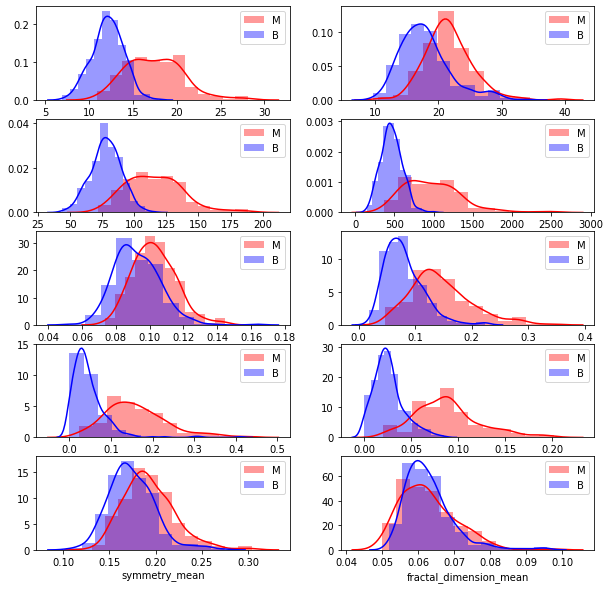

In [ ]:
# BAR CHARTS (VALUE) and HISTOGRAMS (FREQUENCY)
# REAL VALUES,   ...... , BINS or INTERVALS 
#inputs_small.set_index('id', inplace=True)
# DON"t CREATE a new dataFrame, make changes to the existing one itself 
# STRINGS, DATA STRUCTURES, CLASSES, DATAFRAMES -> THESE ARE NOT EDITED, instead new 
# of them are created!!! because they are too computationally expensive to edit! 

# TAKING 6 variable ONLY FOR DEMO PURPOSE
# IN REALITY, COMPARE ALL VARIABLES AGAINST ALL VARIABLES 
inputs_small = data.loc[:,['radius_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]
inputs = inputs.set_index('id')
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inputs.columns):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()


In [15]:
#clean_input 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(clean_input,diagnosis, test_size=0.2, random_state=42)


In [16]:
# NORMALIZE -> Z-Score-> (x-mean)/std
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,14.117635,3.535815,7.69100,11.705000,13.30000,15.740000,28.11000
texture_mean,455.0,19.185033,4.266005,9.71000,16.170000,18.68000,21.585000,39.28000
perimeter_mean,455.0,91.882242,24.322027,47.92000,75.100000,85.98000,103.750000,188.50000
area_mean,455.0,654.377582,354.943187,170.40000,420.300000,551.70000,767.600000,2501.00000
smoothness_mean,455.0,0.095744,0.013923,0.05263,0.085825,0.09462,0.104550,0.16340
compactness_mean,455.0,0.103619,0.052470,0.01938,0.062890,0.09097,0.131300,0.31140
concavity_mean,455.0,0.088898,0.079468,0.00000,0.029320,0.06154,0.132350,0.42680
concave points_mean,455.0,0.048280,0.038060,0.00000,0.020340,0.03341,0.073895,0.20120
symmetry_mean,455.0,0.181099,0.027487,0.11670,0.161850,0.17920,0.195800,0.30400
fractal_dimension_mean,455.0,0.062757,0.007210,0.04996,0.057645,0.06148,0.066100,0.09744


In [18]:
# Now let's normalize
# assumptions (MU and SIGMA)-> will be calculated from training data
mu = stats['mean']
sigma = stats['std']
xtrain_norm = (xtrain-mu)/sigma
print(xtrain_norm.head())
# and will also be applied to testing data
xtest_norm = (xtest-mu)/sigma 
print(xtest_norm.head())

          radius_mean  texture_mean  ...  symmetry_mean  fractal_dimension_mean
id                                   ...                                       
859471      -1.439169     -0.434841  ...       1.091461                2.455470
873593       1.971926      1.731120  ...       2.124665                1.556682
859196      -1.398443     -1.248248  ...       1.928211                0.953329
88466802    -0.980717      1.414665  ...       0.312920                0.073960
858970      -1.116471     -1.009149  ...       3.390704                0.949168

[5 rows x 10 columns]
        radius_mean  texture_mean  ...  symmetry_mean  fractal_dimension_mean
id                                 ...                                       
87930     -0.465985     -0.137138  ...       0.414785                0.134989
859575     1.363862      0.498116  ...      -0.833064               -1.129971
8670       0.379648      0.069144  ...       0.436613               -0.665320
907915    -0.485782     -0.

In [20]:

trainset_norm = pd.concat([xtrain_norm, ytrain])
testset_norm = pd.concat([xtest_norm, ytest])
dataset1 = Dataset.Tabular.register_pandas_dataframe(trainset_norm, datastore, "train_data", show_progress=True)
dataset2 = Dataset.Tabular.register_pandas_dataframe(testset_norm, datastore, "test_data", show_progress=True)


Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/e2451a90-de7c-4db5-bf55-a03cb804d4d2/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.
Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/08dbc35d-f13c-4299-8dda-4eba3c7c2940/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.
